In [59]:
import matplotlib.pylab as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from mord import LogisticIT

from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

### Introduction to dataset 
The objective of this algorithm is to classify the species of Iris based on their features and then train the model to predict the class of new species based on their charateristics.

In [31]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
iris['Number'] = iris.index + 1
iris.head(24)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5,5.0,3.6,1.4,0.2,Iris-setosa,5
5,6,5.4,3.9,1.7,0.4,Iris-setosa,6
6,7,4.6,3.4,1.4,0.3,Iris-setosa,7
7,8,5.0,3.4,1.5,0.2,Iris-setosa,8
8,9,4.4,2.9,1.4,0.2,Iris-setosa,9
9,10,4.9,3.1,1.5,0.1,Iris-setosa,10


In [33]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Number
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,75.500000
std,43.445368,0.828066,0.433594,1.764420,0.763161,43.445368
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,38.250000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,75.500000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,112.750000
max,150.000000,7.900000,4.400000,6.900000,2.500000,150.000000


### Unseen data
Unseen data is a set of data on which model was not trained before, this kind of data is used to check the accuracy of the model based on how it will react to new set of characteristics.
predict_data is a set of features for predicting thier species when fed to trained model.

In [34]:
# dataframe of to predict
predict_data = pd.DataFrame([
    {'SepalLengthCm': 5.8, 'SepalWidthCm': 3.4 ,'PetalLengthCm': 3.1,'PetalWidthCm':0.7},
    {'SepalLengthCm': 7.3, 'SepalWidthCm': 2.7, 'PetalLengthCm':1.9,'PetalWidthCm':1.8},
    {'SepalLengthCm': 4.1, 'SepalWidthCm': 2.8 , 'PetalLengthCm':5.6,'PetalWidthCm':2.3},
])

### Splitting the dataset 
Divide the dataset into train and test with 40% of the data in test and remaining 60% in train.

In [35]:
#spliting the iris data into test and train
train_data, test_data = train_test_split(iris, test_size=0.40, random_state=26)

### Plotting data 
Taking into consideration just sepallength and sepalwidth, plotted graph with dataset and unseen data to visual find the position of unseen data to compare it with result from the model

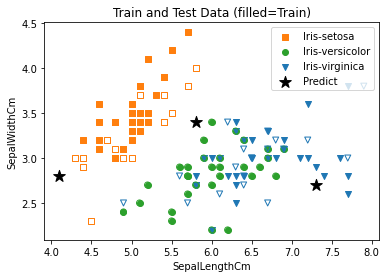

In [36]:
def plot_dataset(train_data, test_data, predict_data, title):
    fig, ax = plt.subplots()

    # train data
    subset = train_data.loc[train_data['Species'] == 'Iris-setosa']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='s', label='Iris-setosa', color='C1')
    subset = train_data.loc[train_data['Species'] == 'Iris-versicolor']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='o', label='Iris-versicolor', color='C2')
    subset = train_data.loc[train_data['Species'] == 'Iris-virginica']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='v', label='Iris-virginica', color='C0')
    for _, row in train_data.iterrows():
        ax.annotate(None, (row.SepalLengthCm, row.SepalWidthCm))

    # test data
    subset = test_data.loc[test_data['Species'] == 'Iris-setosa']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='s', label=None, color='C1', facecolors='none')
    subset = train_data.loc[train_data['Species'] == 'Iris-versicolor']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='o', label=None, color='C2', facecolors='none')
    subset = test_data.loc[test_data['Species'] == 'Iris-virginica']
    ax.scatter(subset.SepalLengthCm, subset.SepalWidthCm, marker='v', label=None, color='C0', facecolors='none')
    for _, row in test_data.iterrows():
        ax.annotate(None, (row.SepalLengthCm, row.SepalWidthCm))

    # predict
    ax.scatter(predict_data.SepalLengthCm, predict_data.SepalWidthCm, marker='*', label='Predict', color='black', s=150)

    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.title(title)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
    
plot_dataset(train_data, test_data, predict_data, 'Train and Test Data (filled=Train)')

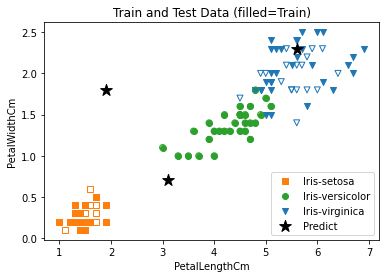

In [61]:
def plot_dataset(train_data, test_data, predict_data, title):
    fig, ax = plt.subplots()

    # train data
    subset = train_data.loc[train_data['Species'] == 'Iris-setosa']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='s', label='Iris-setosa', color='C1')
    subset = train_data.loc[train_data['Species'] == 'Iris-versicolor']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='o', label='Iris-versicolor', color='C2')
    subset = train_data.loc[train_data['Species'] == 'Iris-virginica']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='v', label='Iris-virginica', color='C0')
    for _, row in train_data.iterrows():
        ax.annotate(None, (row.PetalLengthCm, row.PetalWidthCm))

    # test data
    subset = test_data.loc[test_data['Species'] == 'Iris-setosa']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='s', label=None, color='C1', facecolors='none')
    subset = train_data.loc[train_data['Species'] == 'Iris-versicolor']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='o', label=None, color='C2', facecolors='none')
    subset = test_data.loc[test_data['Species'] == 'Iris-virginica']
    ax.scatter(subset.PetalLengthCm, subset.PetalWidthCm, marker='v', label=None, color='C0', facecolors='none')
    for _, row in test_data.iterrows():
        ax.annotate(None, (row.PetalLengthCm, row.PetalWidthCm))

    # predict
    ax.scatter(predict_data.PetalLengthCm, predict_data.PetalWidthCm, marker='*', label='Predict', color='black', s=150)

    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title(title)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
    
plot_dataset(train_data, test_data, predict_data, 'Train and Test Data (filled=Train)')

### Normalizing Data 
As the metric of the features of dataset is in cm, we can avoid here normalizing the data.
Seperating the train and test dataset into target variables as species and predictors as other variables in the datset.

In [37]:
# Initialize a data frame with two columns: `k` and `accuracy`
train_normalized_x = train_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_normalized_y = train_data['Species']
test_normalized_x = test_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_normalized_y = test_data['Species']

### Finding optimum k- value 
The k-value algorithm trace n number of observation in its surrounding to identify the class for the unseen dataset, to find how many observations it should visit before deciding the class is known to be the optimum k-value.
Based on the result below we can see that k-value as 5 gives us the maximum accuracy.

In [38]:
# iterate over a range of nearest neighbor values
# train and check with test
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_normalized_x, train_normalized_y)
    results.append({'k': k, 'accuracy': accuracy_score(test_normalized_y, knn.predict(test_normalized_x))})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.950000
1    2  0.950000
2    3  0.966667
3    4  0.966667
4    5  0.966667
5    6  0.966667
6    7  0.966667
7    8  0.966667
8    9  0.966667
9   10  0.983333
10  11  0.983333
11  12  0.983333
12  13  0.983333
13  14  0.983333


### KNN Classification 
Taking the k-value as 5 trained the model to predict the unseen dataset.
Based on the output we can conclude that this model is able to classify the new dataset accurately.

In [44]:
# train with all data
iris_x = iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_y = iris['Species']
knn = KNeighborsClassifier(n_neighbors=5).fit(iris_x, iris_y)

distances, indices = knn.kneighbors(predict_data)

predictions = knn.predict(predict_data)
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_data.iloc[index])
    print(iris.iloc[indices[index], :])
    
print('accuracy score : ' ,accuracy_score(test_normalized_y, knn.predict(test_normalized_x)))

----------------------------------------------------------------
Iris-versicolor
SepalLengthCm    5.8
SepalWidthCm     3.4
PetalLengthCm    3.1
PetalWidthCm     0.7
Name: 0, dtype: float64
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
79  80            5.7           2.6            3.5           1.0   
64  65            5.6           2.9            3.6           1.3   
82  83            5.8           2.7            3.9           1.2   
98  99            5.1           2.5            3.0           1.1   
81  82            5.5           2.4            3.7           1.0   

            Species  Number  
79  Iris-versicolor      80  
64  Iris-versicolor      65  
82  Iris-versicolor      83  
98  Iris-versicolor      99  
81  Iris-versicolor      82  
----------------------------------------------------------------
Iris-versicolor
SepalLengthCm    7.3
SepalWidthCm     2.7
PetalLengthCm    1.9
PetalWidthCm     1.8
Name: 1, dtype: float64
    Id  SepalLengthCm  SepalWidth

### Logistic Regression 
Convert the species dataset to categorical numeric dataset to be fed into model as target variable.
Train logistics regression model using dataset and then test the accuracy with test dataset.

In [50]:
le = LabelEncoder()
label = le.fit_transform(iris['Species'])
iris["Species_2"] = label

In [51]:
predictors = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
outcome = 'Species_2'

X = iris[predictors]
y = iris[outcome]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# split into training and validation
train_X, test_X, train_y, test_y = train_test_split(X, y,  test_size=0.40, random_state=1)

In [54]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()

### Akaike information criterion (AIC) (Akaike, 1974) is a fined technique based on in-sample 
### fit to estimate the likelihood of a model to predict/estimate the future values.
print('AIC', AIC_score(test_y, logit_reg.predict(test_X), df = len(train_X.columns) + 1))

intercept  1.0666923680899958
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
coeff       1.661137      4.910445      -7.958874     -3.614597

AIC -63.388049748765326


In [55]:
logit_reg_pred = logit_reg.predict(test_X)
logit_reg_proba = logit_reg.predict_proba(test_X)

classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(test_y, logit_reg.predict(test_X))

Confusion Matrix (Accuracy 0.9667)

       Prediction
Actual  0  1  2
     0 31  0  0
     1  0 27  2
     2  0  1 29
Confusion Matrix (Accuracy 0.9833)

       Prediction
Actual  0  1  2
     0 19  0  0
     1  0 21  0
     2  0  1 19


### Naive Bayes
Train the dataset using naive bayes model and check the accuracy of the model

In [57]:
predictors = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
outcome = 'Species_2'

X = iris[predictors]
y = iris[outcome]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# split into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [60]:
# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_test = delays_nb.predict_proba(X_test)

# predict class membership
y_train_pred = delays_nb.predict(X_train)
y_test_pred = delays_nb.predict(X_test)

# accuracy
classificationSummary(y_train, y_train_pred, class_names=classes) 
print()
classificationSummary(y_test, y_test_pred, class_names=classes)
print()

Confusion Matrix (Accuracy 0.9444)

                Prediction
         Actual     Iris-setosa Iris-versicolor  Iris-virginica
    Iris-setosa              31               0               0
Iris-versicolor               0              25               4
 Iris-virginica               0               1              29

Confusion Matrix (Accuracy 0.9333)

                Prediction
         Actual     Iris-setosa Iris-versicolor  Iris-virginica
    Iris-setosa              19               0               0
Iris-versicolor               0              17               4
 Iris-virginica               0               0              20



### Analysis 
Based on the analysis score of all the 3 model and confusion matrix we can conclude that dataset is good to be used to classify more data using any of this model.
1. Logistics regression is ranked as one of the best model as it has highest accuracy and has almost 0 error in confusion matrix.
2. KNN can be ranked as 2nd best model has it has accuracy level lower than logistics and higher than navie bayes.
3. Navie bayes has the lowest accuracy score but with the confusion matrix respect it has almost 0 error.